In [ ]:
#install/import libraries
import pandas as pd
!pip install pandasql
from pandasql import sqldf
import plotly.graph_objects as go
import plotly.express as px
import math


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=0602b0ef3c62f5a7f37fceee4a36de1fd3cac51ebd51a851dcfc336beeead488
  Stored in directory: /root/.cache/pip/wheels/63/e8/ec/75b1df467ecf57b6ececb32cb16f4e86697cbfe55cb0c51f07
Successfully built pandasql


In [ ]:
# Load scopus data
asjc_all = pd.read_excel('asjc_sweden_scopus.xlsx')


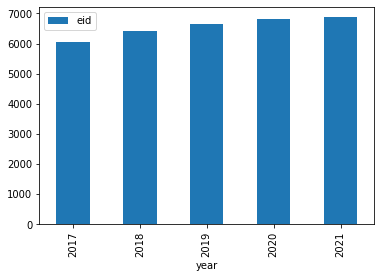

In [ ]:
#group data by year
by_year = asjc_all.groupby(asjc_all.year)['eid'].count().reset_index()
by_year.plot(kind='bar', x='year')
#save to excel
by_year.to_excel('publications_per_year.xlsx', index=False)

<Axes: xlabel='description'>

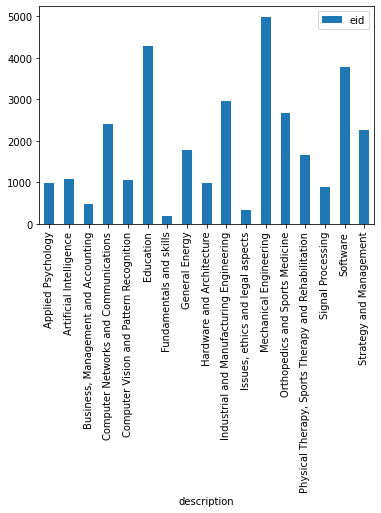

In [ ]:
#group data by field
by_field = asjc_all.groupby(asjc_all.description)['eid'].count().reset_index()
by_field.plot(kind='bar', x='description')
#save to excel
by_field.to_excel('publications_per_field.xlsx', index=False)

In [ ]:
# Yearly counts by asjc field
yearly_counts = asjc_all.groupby(['year', 'description'])['eid'].count().reset_index()
yearly_pivot = yearly_counts.pivot(index='description', columns='year', values='eid')
yearly_pivot = yearly_pivot.fillna(0)
yearly_pivot

#save to excel
yearly_pivot.to_excel('yearly_pivot.xlsx', index=False)

year,2017,2018,2019,2020,2021
description,,,,,
Applied Psychology,177,193,173,201,235
Artificial Intelligence,148,173,207,252,297
"Business, Management and Accounting",93,102,73,118,99
Computer Networks and Communications,474,478,491,502,465
Computer Vision and Pattern Recognition,190,205,205,255,203
Education,700,794,887,972,936
Fundamentals and skills,32,32,32,40,41
General Energy,495,336,354,324,281
Hardware and Architecture,188,160,207,196,228


In [ ]:
# limit to data from Hamlmstad university (hh) ID in Scopus: 60022085 (for id:s to other organisations, see readme file)
query = """

SELECT*
           FROM asjc_all 
           WHERE affiliations LIKE '%60022085%'
        """

# Execute the query
asjc_publ_hh = sqldf(query)
asjc_publ_hh

#save the data to excel
asjc_publ_hh.to_excel('asjc_publications_hh.xlsx')






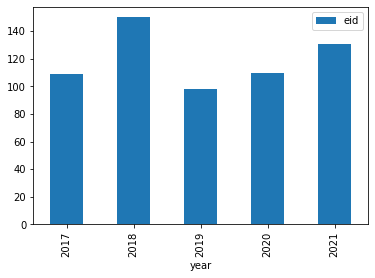

In [ ]:
#group data by year (hh)
by_year_hh = asjc_publ_hh.groupby(asjc_publ_hh.year)['eid'].count().reset_index()
by_year_hh.plot(kind='bar', x='year')
#save to excel
by_year_hh.to_excel('publications_per_year_hh.xlsx', index=False)

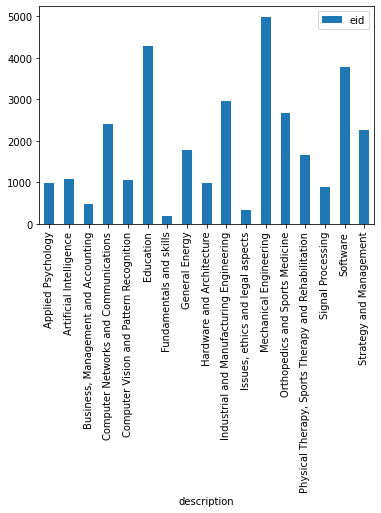

In [ ]:
#group data by field
by_field_hh = asjc_publ_hh.groupby(asjc_publ_hh.description)['eid'].count().reset_index()
by_field.plot(kind='bar', x='description')
#save to excel
by_field_hh.to_excel('publications_per_field_hh.xlsx', index=False)

In [ ]:
# Yearly counts by asjc field (hh)
yearly_counts = asjc_publ_hh.groupby(['year', 'description'])['eid'].count().reset_index()
yearly_pivot = yearly_counts.pivot(index='description', columns='year', values='eid')
yearly_pivot = yearly_pivot.fillna(0)
yearly_pivot

#save to excel
#yearly_pivot_hh.to_excel('yearly_pivot_hh.xlsx', index=False)

year,2017,2018,2019,2020,2021
description,,,,,
Applied Psychology,8.0,12.0,12.0,15.0,17.0
Artificial Intelligence,2.0,3.0,5.0,7.0,10.0
"Business, Management and Accounting",3.0,5.0,2.0,2.0,1.0
Computer Networks and Communications,7.0,16.0,6.0,13.0,3.0
Computer Vision and Pattern Recognition,3.0,8.0,4.0,4.0,4.0
Education,8.0,8.0,16.0,8.0,8.0
Fundamentals and skills,7.0,7.0,1.0,5.0,5.0
General Energy,6.0,9.0,3.0,1.0,6.0
Hardware and Architecture,6.0,5.0,2.0,8.0,3.0


In [ ]:
#load benchmark data
asjc_benchmark = pd.read_excel('halmstad_asjc_benchmark_2017-2021.xlsx')


In [ ]:
#create bubble chart
fig_benchmark = px.scatter(asjc_benchmark, x="relative_impact", y="relative_specialization", log_x=True, size = "publication_count", size_max=25, color="asjc_description", hover_name="org")

# Add dropdown
fig_benchmark.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=["type", "scatter"],
                    label="Scatter Plot",
                    method="restyle"
                ),
                dict(
                    args=["type", "bar"],
                    label="Bar Chart",
                    method="restyle"
                )
            ]),
            direction="down",
        ),
    ]
)


#show
fig_benchmark.show()
#save as html
#fig_benchmark.write_html("benchmark_asjc.html")

In [ ]:
#create bubble chart hh
asjc_benchmark_hh = pd.read_excel('asjc_hh_benchmark.xlsx')
fig_benchmark_hh = px.scatter(asjc_benchmark_hh, x="relative_impact", y="relative_specialization", log_x=True, size = "publication_count", size_max=60, color="asjc_description", hover_name="org")

#show
fig_benchmark_hh.show()
#save as html
fig_benchmark_hh.write_html("benchmark_hh.html")

In [ ]:
fig_benchmark_hh.write_html("benchmark_hh.html")